IMPORTING LIBRARIES

In [53]:
#Importing all the required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn import model_selection
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')

In [54]:
#reading and loading dataset
digital_marketing = pd.read_csv('digital_marketing_campaign_dataset.csv')
digital_marketing.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [55]:
digital_marketing.columns.values

array(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype=object)

In [56]:
digital_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [57]:
digital_marketing.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [58]:
digital_marketing.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [59]:
# Creating a new DataFrame 'df' by selecting all rows and all columns except the first one from 'digital_marketing'
df = digital_marketing.iloc[:,1:]
df

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [60]:
#understanding the target variable distribution
df['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

The conversion value counts shows a highly imbalanced target variable, where 87.65% are converted and only 12.35% are not converted


EXPLORATORY DATA ANALYSIS 

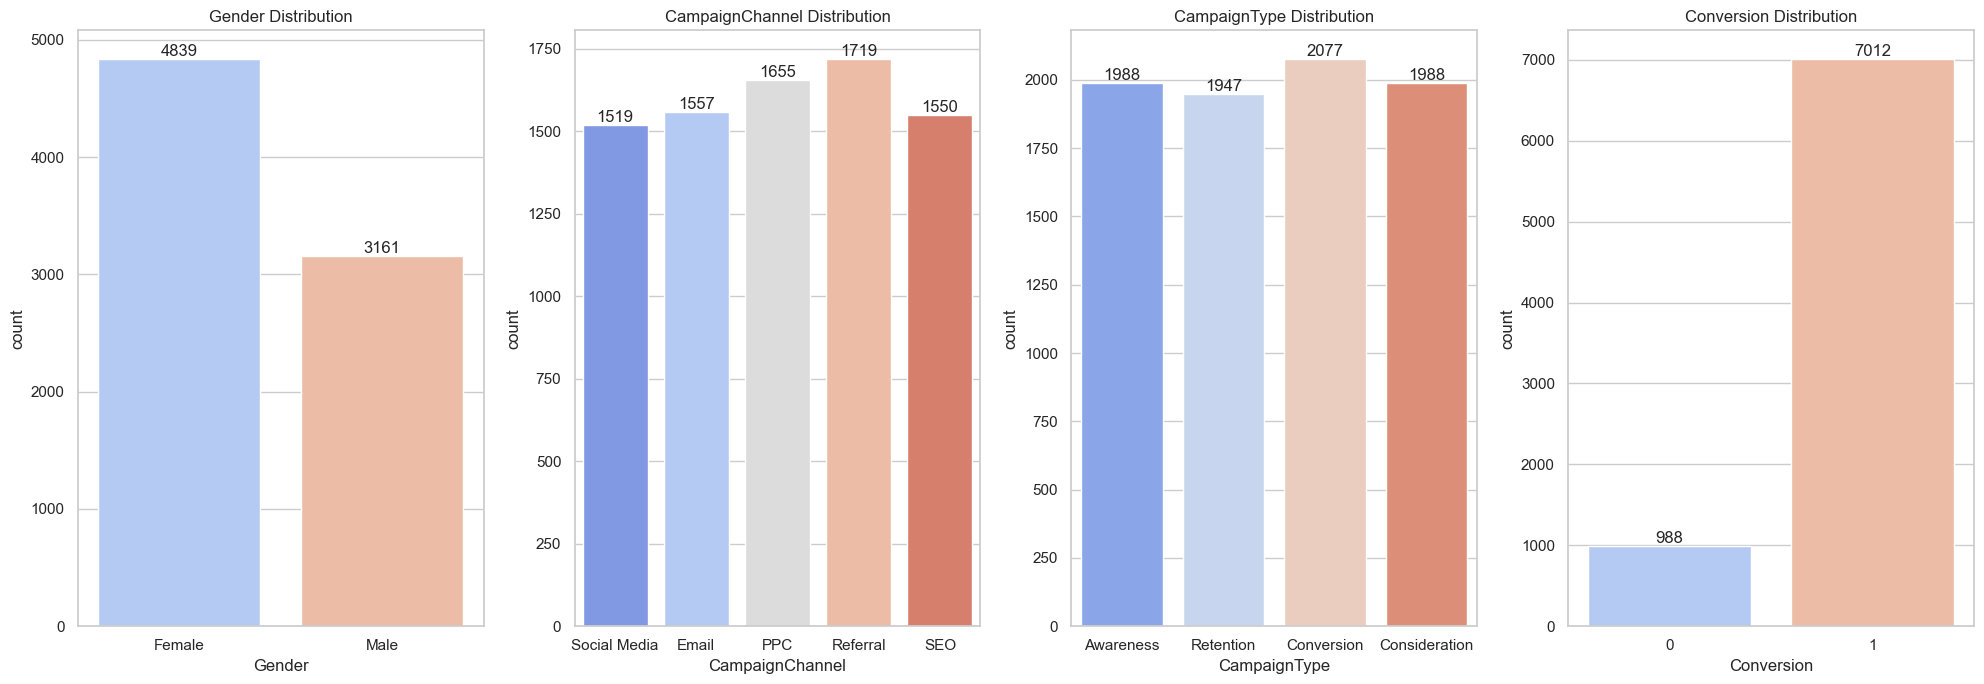

In [61]:
columns = ['Gender', 'CampaignChannel','CampaignType', 'Conversion']
fig, axes = plt.subplots(1, len(columns), figsize=(20,7))

for ax, columns in zip(axes, columns):
    sns.countplot(x=columns, data =df, palette = 'coolwarm',  ax = ax)
    ax.set_title(f'{columns} Distribution')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The above graphs show the distribution of different variables including the target variable where we can see a clear imbalance

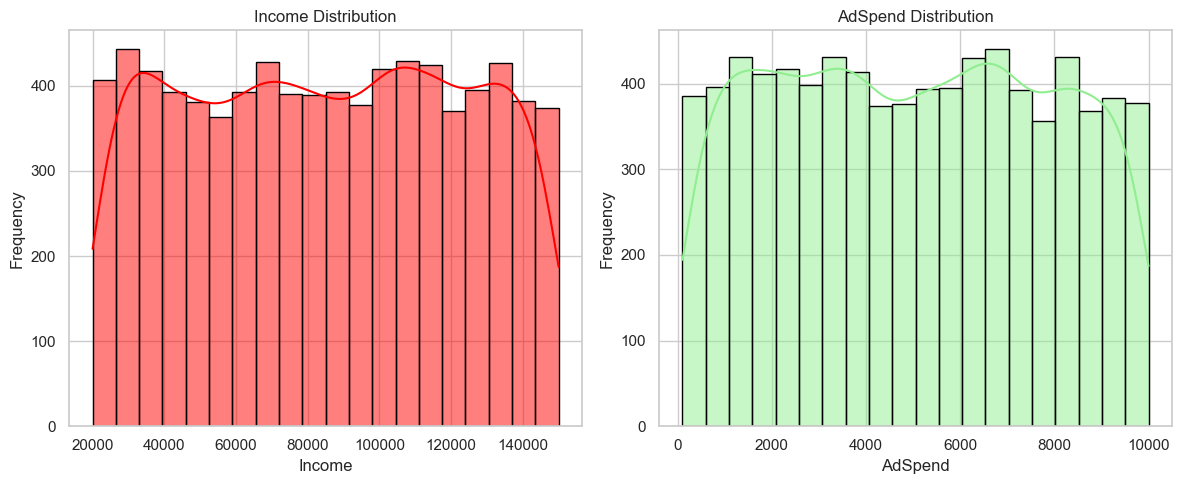

In [62]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram and KDE for Income
sns.histplot(df['Income'], bins=20, color='red', edgecolor='black', kde=True, ax=ax[0])
ax[0].set_title('Income Distribution')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Frequency')

# Histogram and KDE for AdSpend
sns.histplot(df['AdSpend'], bins=20, color='lightgreen', edgecolor='black', kde=True, ax=ax[1])
ax[1].set_title('AdSpend Distribution')
ax[1].set_xlabel('AdSpend')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The 2 graph show the distribution of Income of the customers and Adspend being done on Marketing

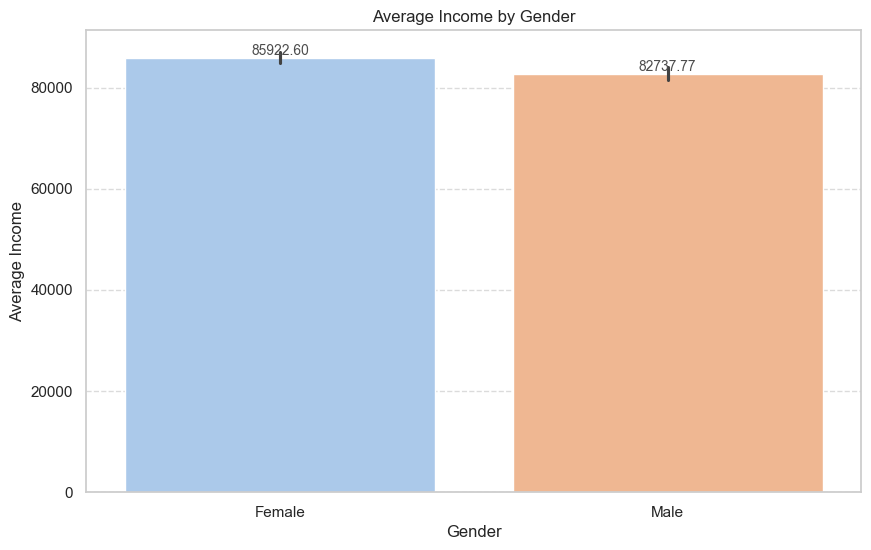

In [63]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Income', data=df, palette='pastel')
plt.title('Average Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the exact income values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='#4d4d4d'
    )

plt.show()

There is no significant difference between the Average income of the 2 genders

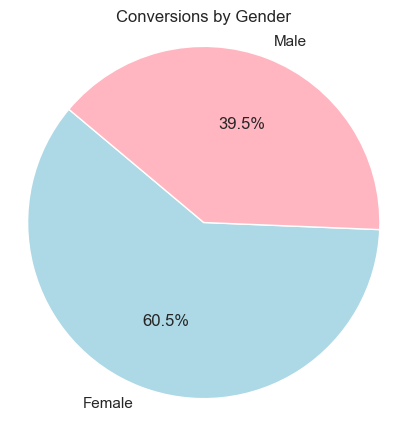

In [64]:
conversion_by_gender = df[df['Conversion'] == 1]['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(conversion_by_gender, labels=conversion_by_gender.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)
plt.title('Conversions by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The pie chart shows that out of the conversions % by gender, and as it clearly shows Females are converting more as compared to males, eventhough there is no significant difference in the incomes of the 2 genders


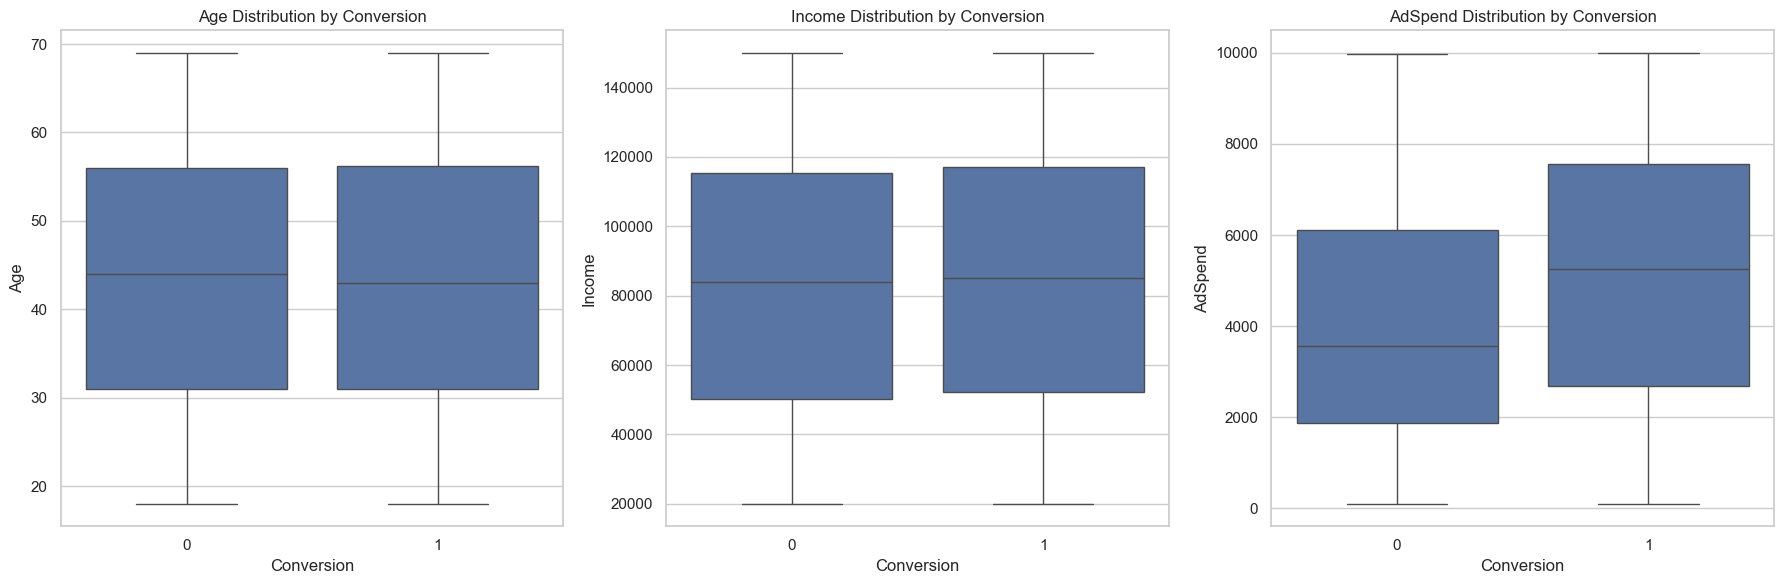

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Age Box Plot
sns.boxplot(x='Conversion', y='Age', data=df, ax=ax[0])
ax[0].set_title('Age Distribution by Conversion')
ax[0].set_xlabel('Conversion')
ax[0].set_ylabel('Age')

# Income Box Plot
sns.boxplot(x='Conversion', y='Income', data=df, ax=ax[1])
ax[1].set_title('Income Distribution by Conversion')
ax[1].set_xlabel('Conversion')
ax[1].set_ylabel('Income')

# AdSpend Box Plot
sns.boxplot(x='Conversion', y='AdSpend', data=df, ax=ax[2])
ax[2].set_title('AdSpend Distribution by Conversion')
ax[2].set_xlabel('Conversion')
ax[2].set_ylabel('AdSpend')

plt.tight_layout()
plt.show()


The 3 boxplots show the relationship between AGE, INCOME and ADSPEND with Conversion, we can see that more adspend results in more conversions, as the median Adspend is very different for the target variable. 

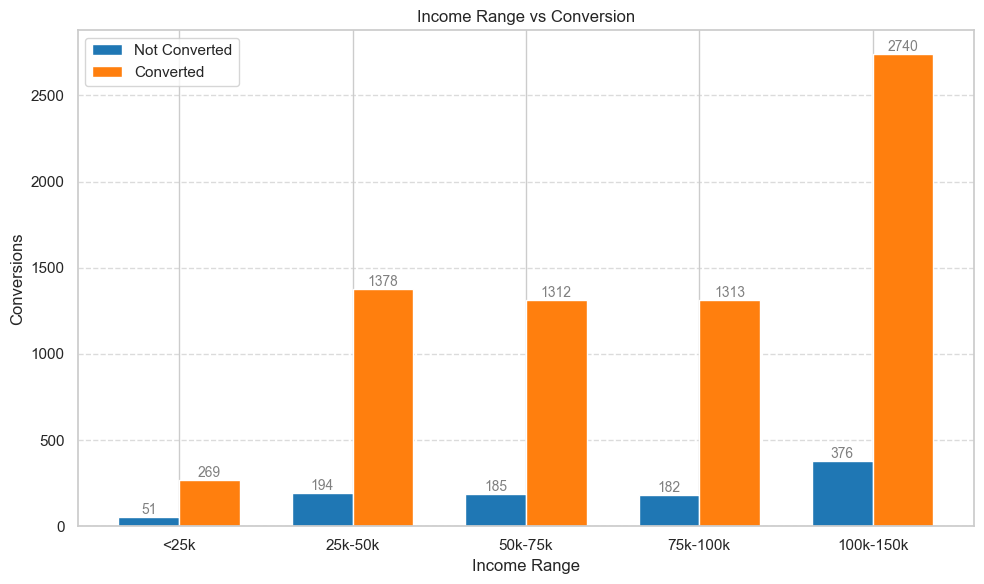

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define income bins and labels
income_bins = [0, 25000, 50000, 75000, 100000, 150000]
income_labels = ['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k']

df['Income Range'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)
income_conversions = df.groupby(['Income Range', 'Conversion'])['Income'].count().unstack(fill_value=0)

x = np.arange(len(income_conversions.index))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Updated colors
rects1 = ax.bar(x - width/2, income_conversions[0], width, label='Not Converted', color='#1f77b4')
rects2 = ax.bar(x + width/2, income_conversions[1], width, label='Converted', color='#ff7f0e')

# Labels and Title
ax.set_xlabel('Income Range')
ax.set_ylabel('Conversions')
ax.set_title('Income Range vs Conversion')
ax.set_xticks(x)
ax.set_xticklabels(income_conversions.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, f'{height}',
        ha='center', va='bottom', fontsize=10, color='#808080'
    )

ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


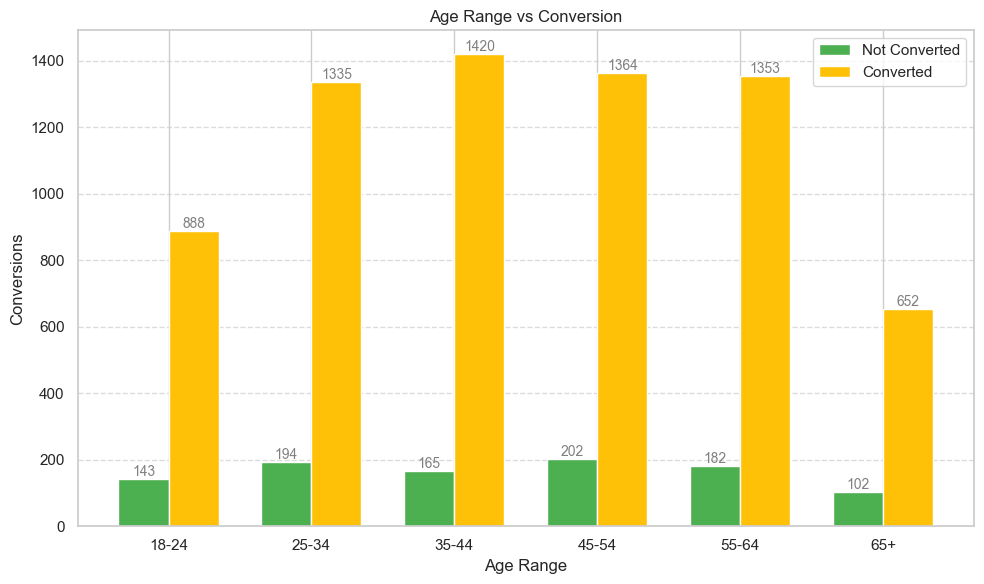

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age range and conversion status, then count
age_conversions = df.groupby(['Age Range', 'Conversion'])['Age'].count().unstack(fill_value=0)

x = np.arange(len(age_conversions.index))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Updated colors
rects1 = ax.bar(x - width/2, age_conversions[0], width, label='Not Converted', color='#4CAF50')
rects2 = ax.bar(x + width/2, age_conversions[1], width, label='Converted', color='#FFC107')

# Labels and Title
ax.set_xlabel('Age Range')
ax.set_ylabel('Conversions')
ax.set_title('Age Range vs Conversion')
ax.set_xticks(x)
ax.set_xticklabels(age_conversions.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, f'{height}',
        ha='center', va='bottom', fontsize=10, color='#808080'
    )

ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [68]:
# Grouping the data by 'CampaignType' and 'CampaignChannel' and calculating the mean for each specified metric.
# This allows us to analyze the performance of different campaigns based on their type and channel.
aggregated_data = df.groupby(['CampaignType', 'CampaignChannel']).agg({'AdSpend': 'mean', 
                                                                         'ClickThroughRate': 'mean', 
                                                                         'ConversionRate' :'mean', 
                                                                         'WebsiteVisits': 'mean', 
                                                                         'PagesPerVisit': 'mean', 
                                                                         'TimeOnSite': 'mean',
                                                                         'SocialShares': 'mean', 
                                                                         'EmailOpens': 'mean', 
                                                                         'EmailClicks': 'mean'}).reset_index()
print(aggregated_data)
                            

     CampaignType CampaignChannel      AdSpend  ClickThroughRate  \
0       Awareness           Email  4881.174370          0.151545   
1       Awareness             PPC  4992.213287          0.164482   
2       Awareness        Referral  5151.421571          0.156160   
3       Awareness             SEO  5132.001477          0.154256   
4       Awareness    Social Media  5183.625376          0.151575   
5   Consideration           Email  4968.120976          0.153286   
6   Consideration             PPC  5003.265222          0.156585   
7   Consideration        Referral  5004.175064          0.146247   
8   Consideration             SEO  4944.592092          0.153421   
9   Consideration    Social Media  4880.365527          0.149641   
10     Conversion           Email  5169.923986          0.157508   
11     Conversion             PPC  4827.322165          0.153070   
12     Conversion        Referral  5002.671732          0.154299   
13     Conversion             SEO  4927.463843  

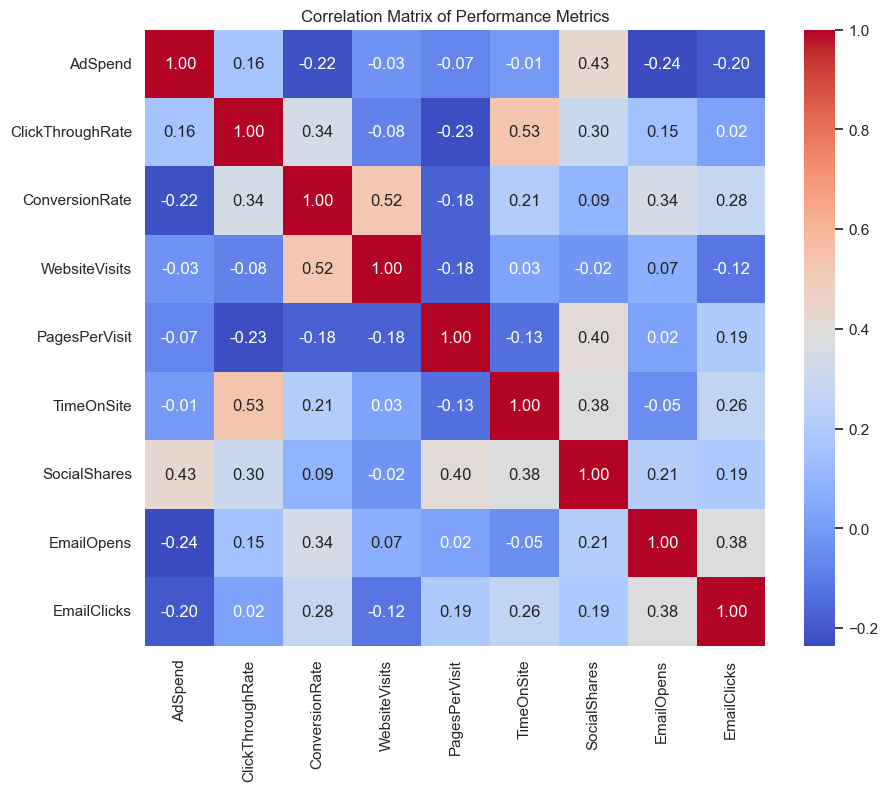

In [69]:
# Heatmap for correlation matrix
correlation_matrix = aggregated_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

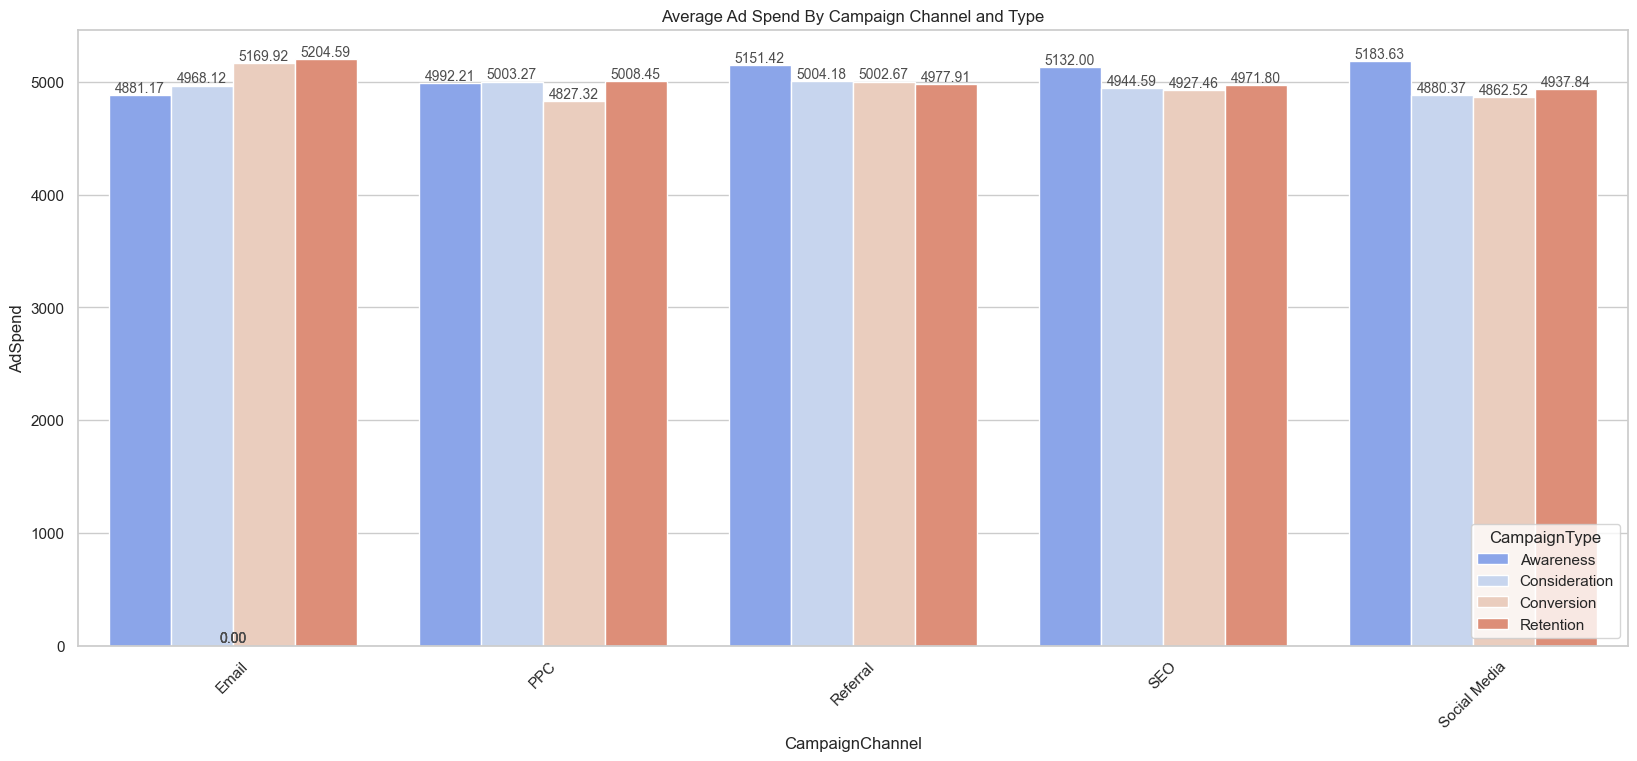

In [70]:

# Bar plots for AdSpend by Campaign Type and Channel
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='CampaignChannel', y='AdSpend', hue='CampaignType', data=aggregated_data, palette='coolwarm')
plt.title('Average Ad Spend By Campaign Channel and Type')
plt.xticks(rotation=45)

# Adding the value to each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='#4d4d4d'
    )


The Above chart showcases the average ADSpend by campaign type and channel. We can see the highest spend on Email in retention and Social media in awareness, so hopefully these 2 should provide teh highest ctr and conversion rate 

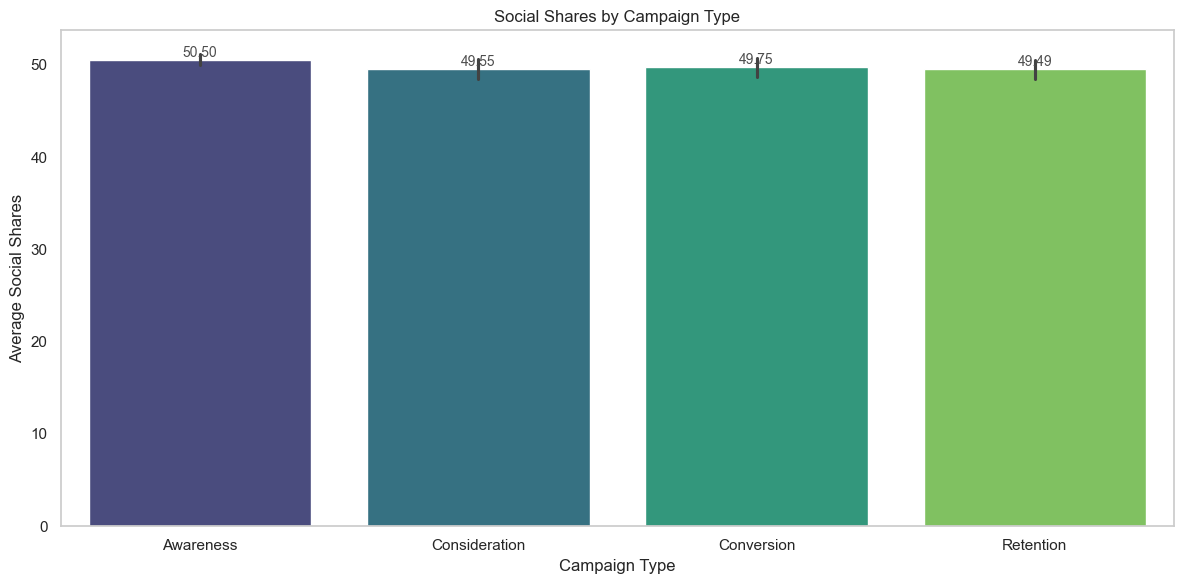

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Social Shares by Campaign Type
plt.figure(figsize=(12, 6))
sns.barplot(x='CampaignType', y='SocialShares', data=aggregated_data, palette='viridis')
plt.title('Social Shares by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Social Shares')
plt.grid(axis='y', linestyle='', alpha=0.5)

# Adding the value to each bar
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='#4d4d4d'
    )

plt.tight_layout()
plt.show()


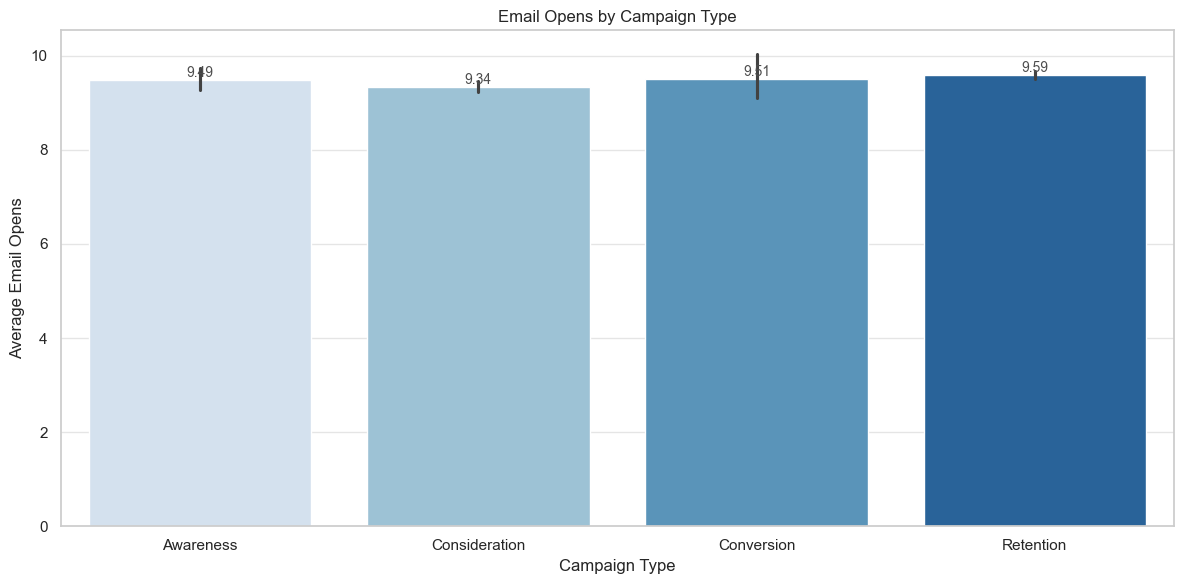

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Email Opens by Campaign Type
plt.figure(figsize=(12, 6))
sns.barplot(x='CampaignType', y='EmailOpens', data=aggregated_data, palette='Blues')
plt.title('Email Opens by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Email Opens')
plt.grid(axis='y', alpha=0.5)

# Adding the value to each bar
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='#4d4d4d'
    )

plt.tight_layout()
plt.show()


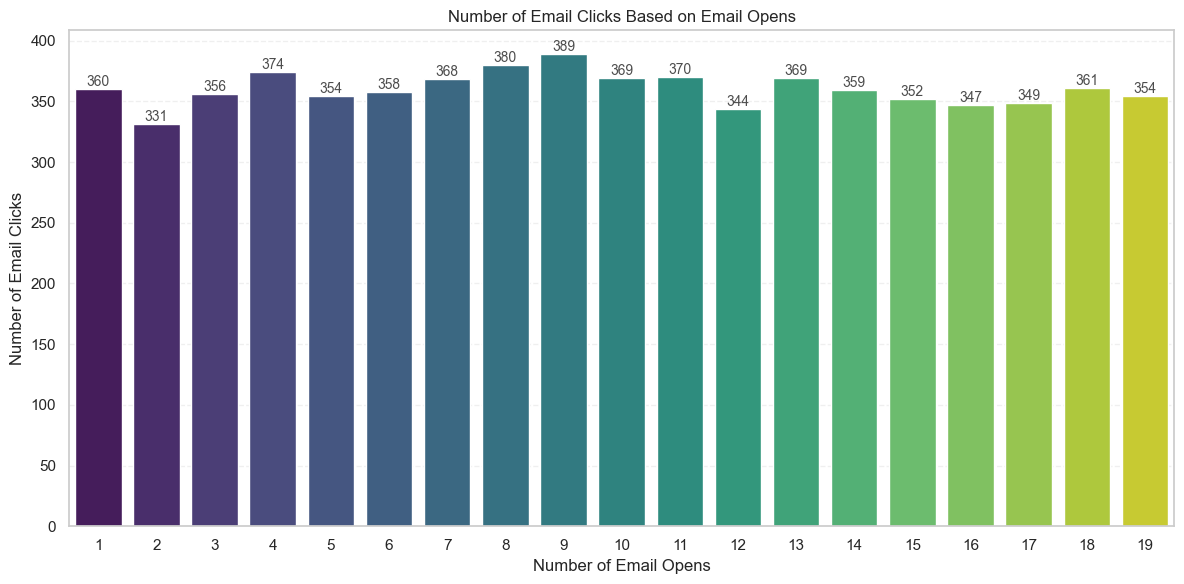

In [73]:
# Filter the data to include only rows with email opens
email_opens_df = df[df['EmailOpens'] > 0]

# Aggregating the counts for email opens and email clicks
email_opens_df['Clicks'] = email_opens_df['EmailClicks'] > 0

# Counting the number of clicks for each email open
email_click_counts = email_opens_df.groupby('EmailOpens')['Clicks'].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=email_click_counts.index, y=email_click_counts.values, palette='viridis')
plt.title('Number of Email Clicks Based on Email Opens')
plt.xlabel('Number of Email Opens')
plt.ylabel('Number of Email Clicks')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adding the value to each bar
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='#4d4d4d'
    )

plt.tight_layout()
plt.show()


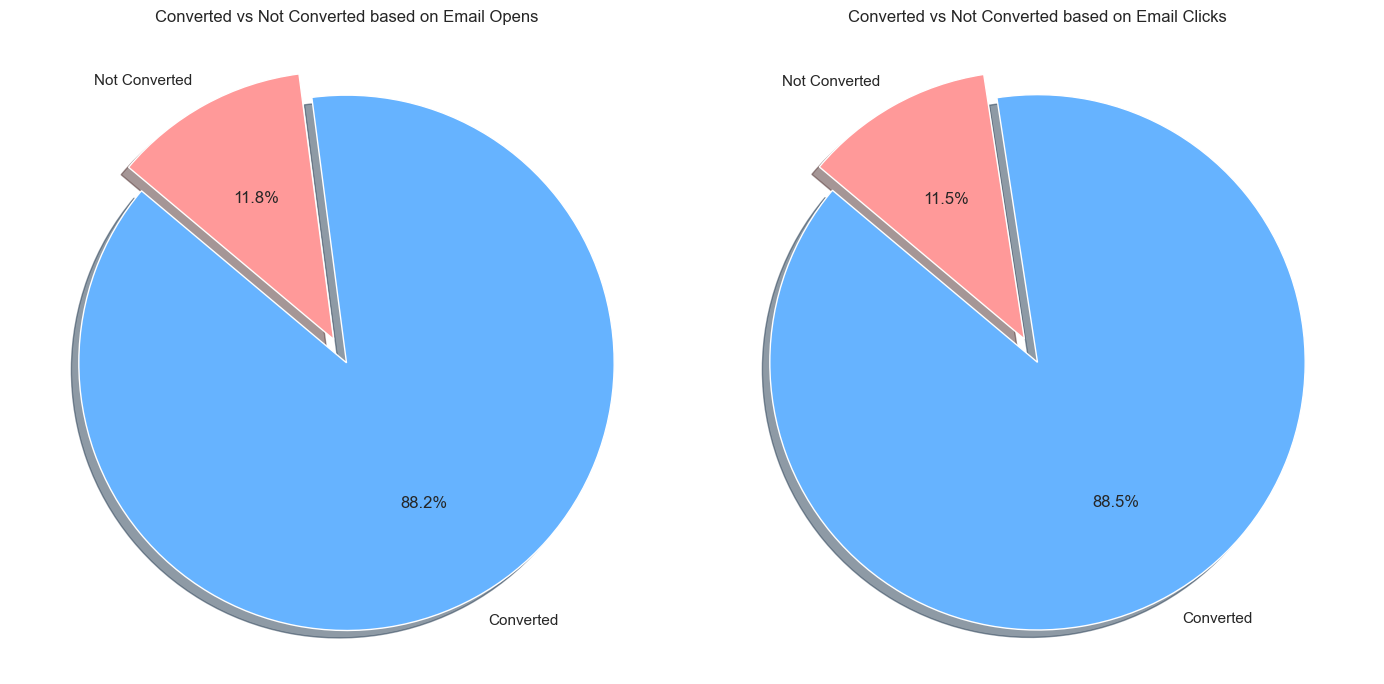

In [74]:
import matplotlib.pyplot as plt

# Filter the data to include only rows with email opens and clicks
email_opens_df = df[df['EmailOpens'] > 0]
email_clicks_df = df[df['EmailClicks'] > 0]

# Aggregating the counts for conversions and non-conversions for email opens
converted_opens = email_opens_df[email_opens_df['Conversion'] == 1].shape[0]
not_converted_opens = email_opens_df[email_opens_df['Conversion'] == 0].shape[0]

# Aggregating the counts for conversions and non-conversions for email clicks
converted_clicks = email_clicks_df[email_clicks_df['Conversion'] == 1].shape[0]
not_converted_clicks = email_clicks_df[email_clicks_df['Conversion'] == 0].shape[0]

# Creating labels and sizes for the pie charts
labels_opens = ['Converted', 'Not Converted']
sizes_opens = [converted_opens, not_converted_opens]
labels_clicks = ['Converted', 'Not Converted']
sizes_clicks = [converted_clicks, not_converted_clicks]

colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Explode the 'Converted' slice slightly

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the pie chart for email opens
ax1.pie(sizes_opens, explode=explode, labels=labels_opens, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Converted vs Not Converted based on Email Opens')

# Plotting the pie chart for email clicks
ax2.pie(sizes_clicks, explode=explode, labels=labels_clicks, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Converted vs Not Converted based on Email Clicks')

plt.tight_layout()
plt.show()


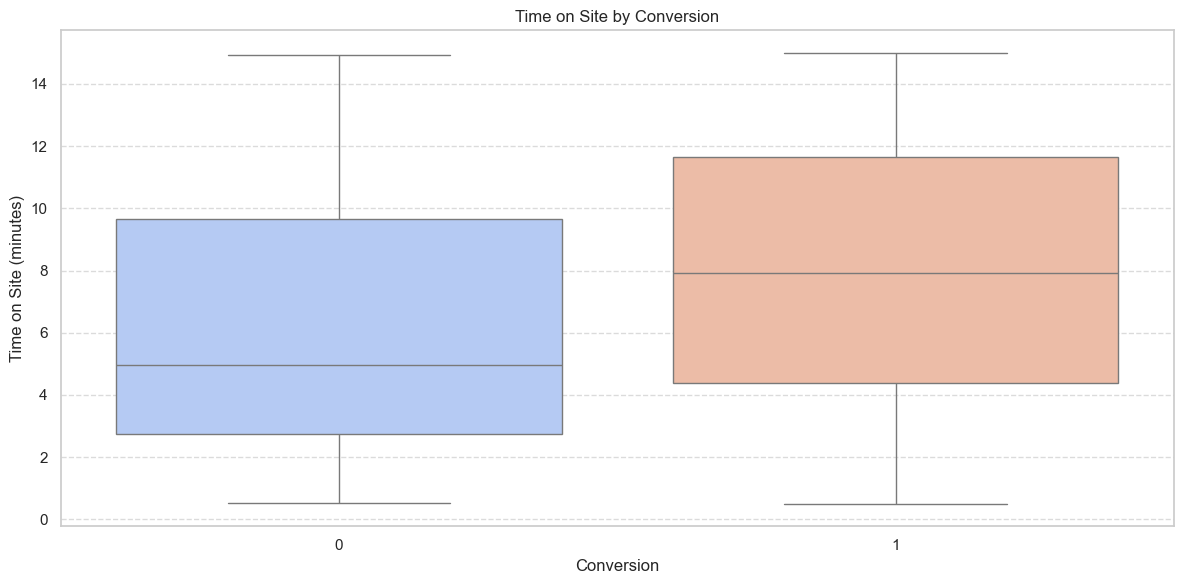

In [75]:
# Box plot to visualize the distribution of Time on Site by Conversion
plt.figure(figsize=(12, 6))
sns.boxplot(x='Conversion', y='TimeOnSite', data=df, palette='coolwarm')
plt.title('Time on Site by Conversion')
plt.xlabel('Conversion')
plt.ylabel('Time on Site (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


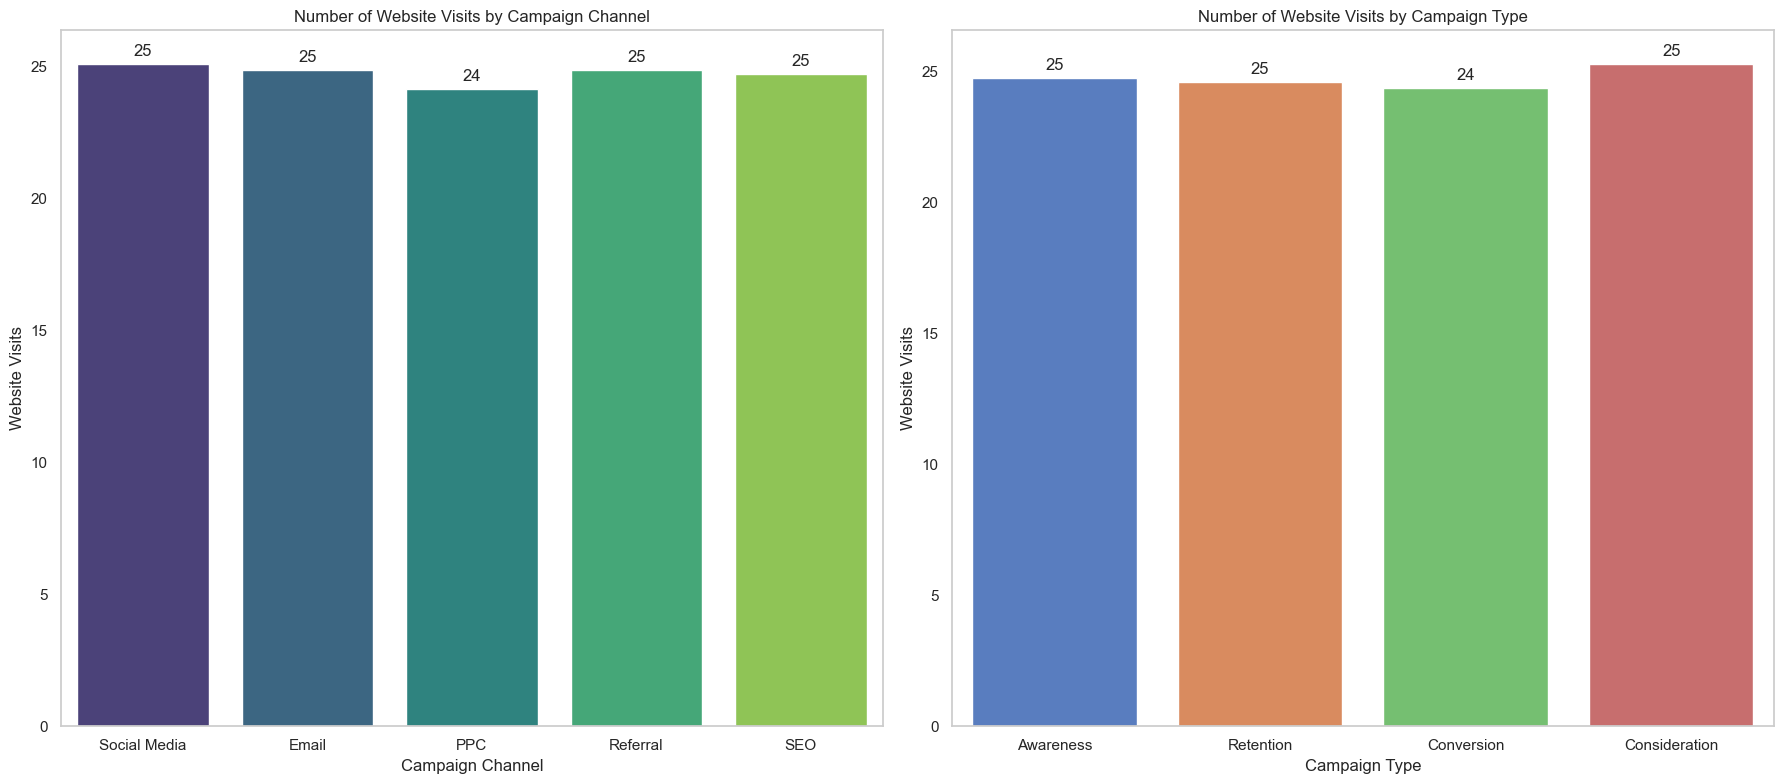

In [76]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot for Website Visits by Campaign Channel
sns.barplot(x='CampaignChannel', y='WebsiteVisits', data=df, ci=None, palette='viridis', ax=ax1)
ax1.set_title('Number of Website Visits by Campaign Channel')
ax1.set_xlabel('Campaign Channel')
ax1.set_ylabel('Website Visits')

# Adding average values above each bar for Campaign Channel
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')
ax1.grid(False)

# Bar plot for Website Visits by Campaign Type
sns.barplot(x='CampaignType', y='WebsiteVisits', data=df, ci=None, palette='muted', ax=ax2)
ax2.set_title('Number of Website Visits by Campaign Type')
ax2.set_xlabel('Campaign Type')
ax2.set_ylabel('Website Visits')

# Adding average values above each bar for Campaign Type
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')
ax2.grid(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



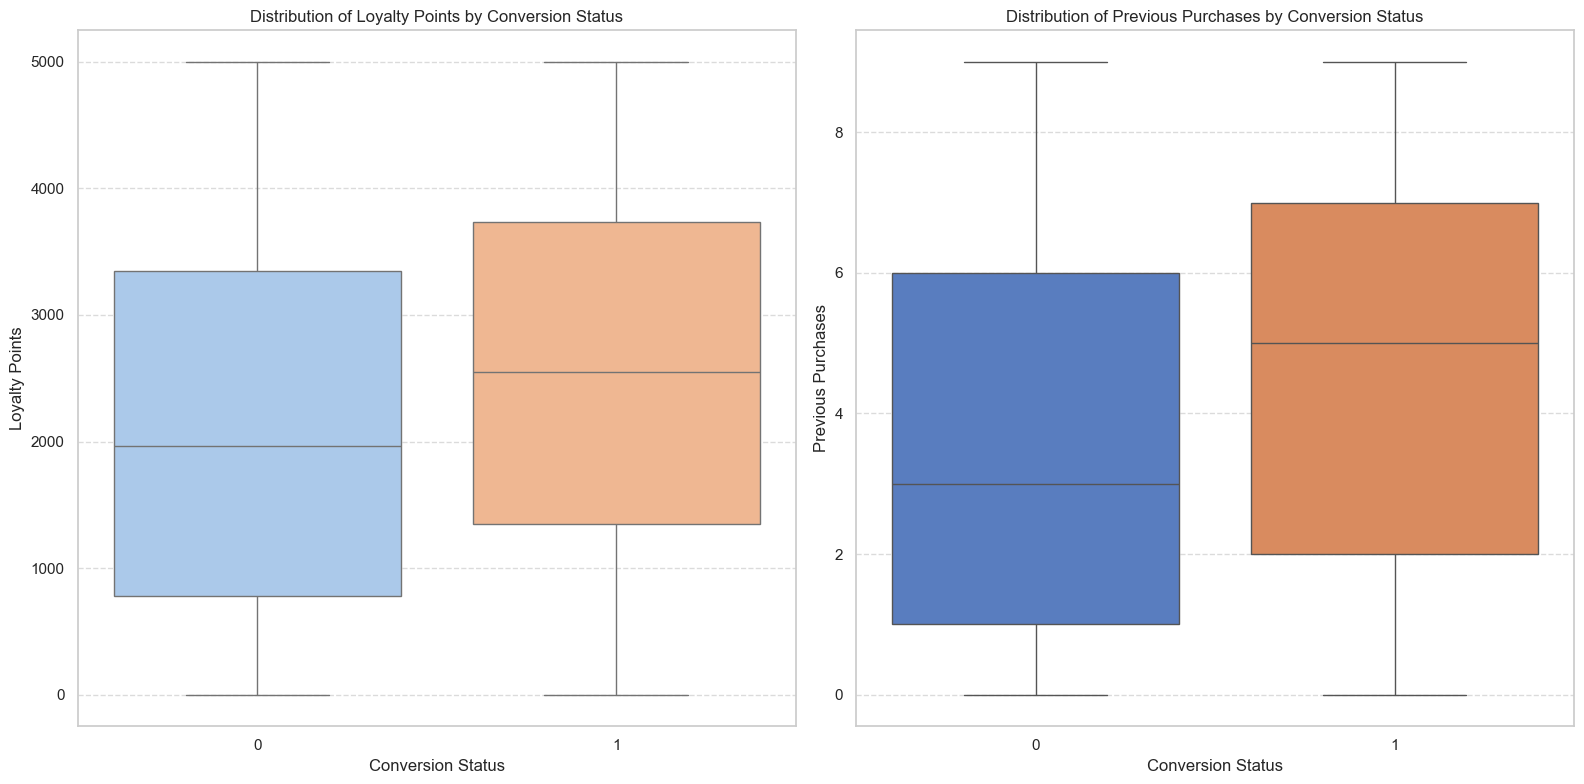

In [77]:
# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Box plot for Loyalty Points
sns.boxplot(x='Conversion', y='LoyaltyPoints', data=df, palette='pastel', ax=ax1)
ax1.set_title('Distribution of Loyalty Points by Conversion Status')
ax1.set_xlabel('Conversion Status')
ax1.set_ylabel('Loyalty Points')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for Previous Purchases
sns.boxplot(x='Conversion', y='PreviousPurchases', data=df, palette='muted', ax=ax2)
ax2.set_title('Distribution of Previous Purchases by Conversion Status')
ax2.set_xlabel('Conversion Status')
ax2.set_ylabel('Previous Purchases')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


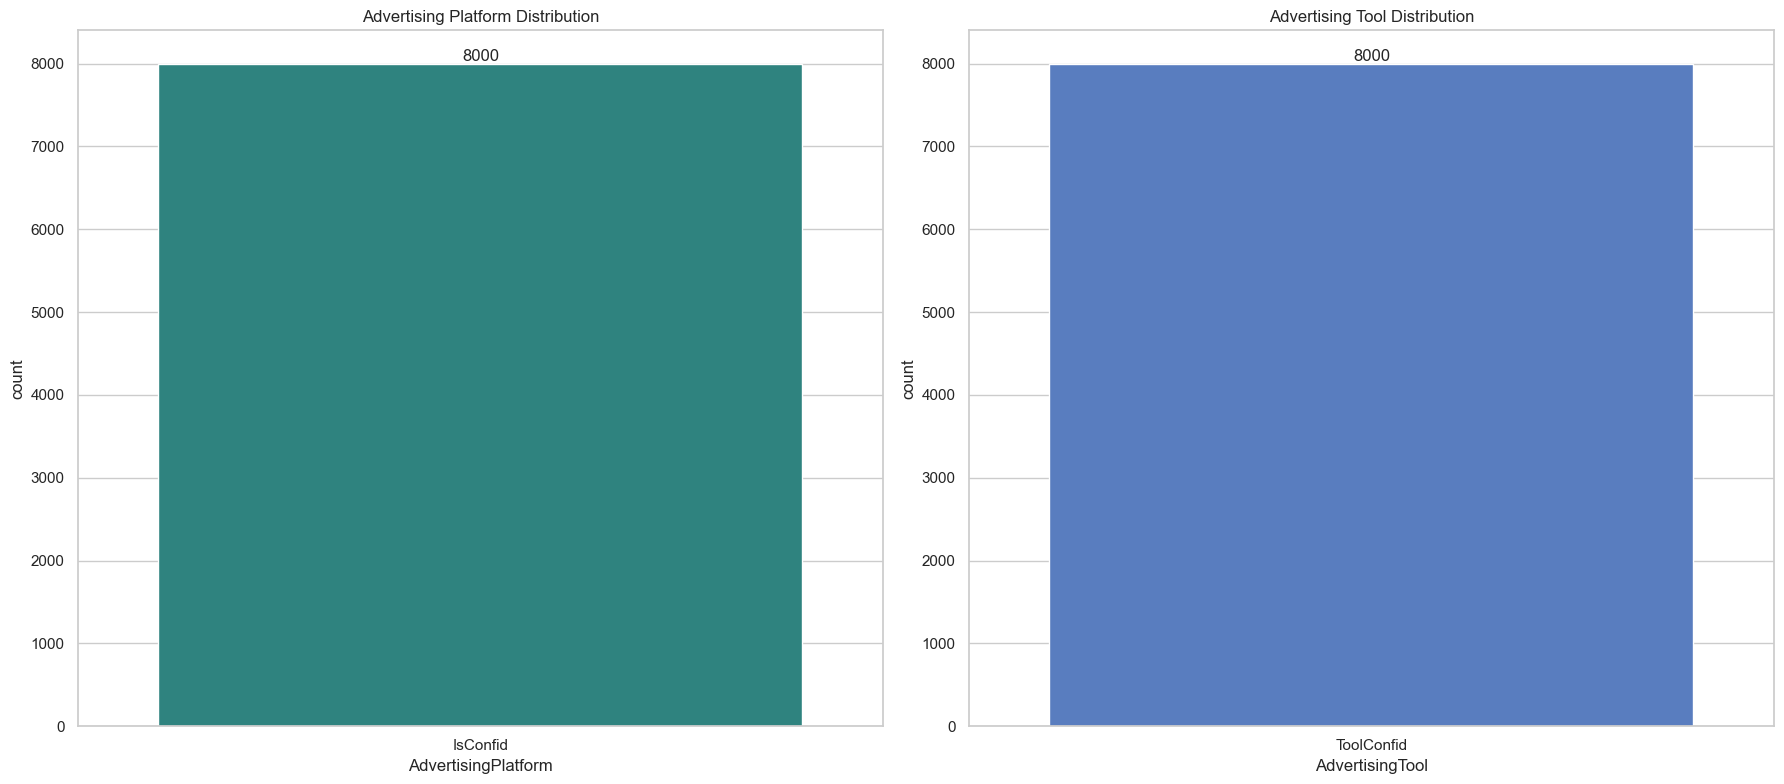

In [78]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Count plot for Advertising Platform
ax1 = sns.countplot(x='AdvertisingPlatform', data=df, palette='viridis', ax=ax1)
ax1.set_title('Advertising Platform Distribution')
for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Count plot for Advertising Tool
ax2 = sns.countplot(x='AdvertisingTool', data=df, palette='muted', ax=ax2)
ax2.set_title('Advertising Tool Distribution')
for p in ax2.patches:
    ax2.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Advertising Platform and Tool have confidention data in it which will not be useful

In [79]:
#Dropping the the 2 coloumns as they have confidential data which will not be useful for the prediction
df = digital_marketing.drop(columns = ['AdvertisingPlatform', 'AdvertisingTool'])



In [80]:
df2  = pd.get_dummies(digital_marketing, drop_first=True)
df2 = df2.iloc[:,1:]
df2.head()


,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,688,1,False,False,False,False,True,False,False,False
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,3459,1,True,False,False,False,False,False,False,True
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,2337,1,False,True,False,False,False,False,False,False
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,2463,1,False,True,False,False,False,False,True,False
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,4345,1,False,True,False,False,False,False,True,False


In [81]:
df2 = df2.applymap(lambda x: 1 if x is True else(0 if x is False else x))
df2.head()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,688,1,0,0,0,0,1,0,0,0
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,3459,1,1,0,0,0,0,0,0,1
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,2337,1,0,1,0,0,0,0,0,0
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,2463,1,0,1,0,0,0,0,1,0
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,4345,1,0,1,0,0,0,0,1,0


In [82]:
# Ensure X and y are properly defined
y = df2['Conversion'].values
x = df2.drop(columns=['Conversion'])

# Apply MinMax Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Split data into train and test sets (use same random_state for reproducibility)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print new shapes to confirm fix
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (6400, 21)
x_test shape: (1600, 21)
y_train shape: (6400,)
y_test shape: (1600,)


DECISION TREE CLASSIFIER

In [83]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='gini')

# Train model
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.884375
              precision    recall  f1-score   support

           0       0.58      0.16      0.25       194
           1       0.89      0.98      0.94      1406

    accuracy                           0.88      1600
   macro avg       0.74      0.57      0.59      1600
weighted avg       0.86      0.88      0.85      1600



In [84]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5,class_weight='balanced', random_state=42, criterion='gini')

# Train model
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.765
              precision    recall  f1-score   support

           0       0.28      0.60      0.38       194
           1       0.93      0.79      0.85      1406

    accuracy                           0.77      1600
   macro avg       0.61      0.69      0.62      1600
weighted avg       0.85      0.77      0.80      1600



In [85]:
# Get feature importance scores
feature_importance = dt_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort features by importance (Descending Order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(importance_df)


                         Feature  Importance
11             PreviousPurchases    0.185163
7                     TimeOnSite    0.145842
9                     EmailOpens    0.139435
2                        AdSpend    0.111343
4                 ConversionRate    0.102690
12                 LoyaltyPoints    0.090796
6                  PagesPerVisit    0.067440
3               ClickThroughRate    0.058995
10                   EmailClicks    0.048708
19       CampaignType_Conversion    0.022281
5                  WebsiteVisits    0.020915
1                         Income    0.006392
0                            Age    0.000000
8                   SocialShares    0.000000
13                   Gender_Male    0.000000
15      CampaignChannel_Referral    0.000000
14           CampaignChannel_PPC    0.000000
16           CampaignChannel_SEO    0.000000
17  CampaignChannel_Social Media    0.000000
18    CampaignType_Consideration    0.000000
20        CampaignType_Retention    0.000000


RANDOM FOREST CLASSIFIER

In [86]:
#Fiting the random forest model
model_rf = RandomForestClassifier(n_estimators=1000,class_weight='balanced',criterion = 'gini', oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(x_train, y_train)
# Make predictions

prediction_test = model_rf.predict(x_test)
print(accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.840625
              precision    recall  f1-score   support

           0       0.41      0.74      0.53       194
           1       0.96      0.85      0.90      1406

    accuracy                           0.84      1600
   macro avg       0.69      0.80      0.72      1600
weighted avg       0.89      0.84      0.86      1600



<Axes: >

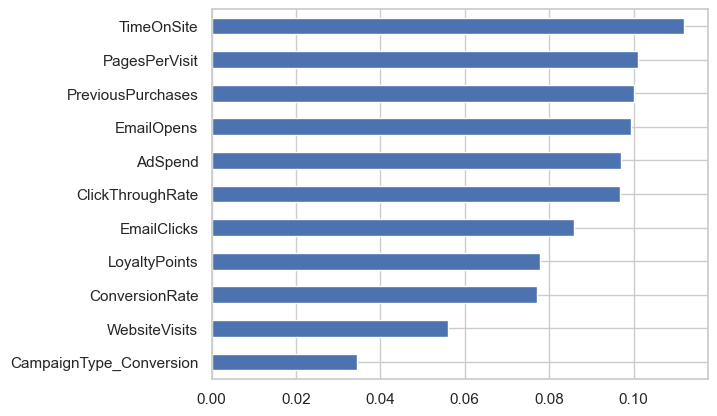

In [87]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[10:].plot(kind = 'barh')

XG BOOST

In [88]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


0.91625

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.43      0.55       194
           1       0.93      0.98      0.95      1406

    accuracy                           0.92      1600
   macro avg       0.85      0.71      0.75      1600
weighted avg       0.91      0.92      0.91      1600



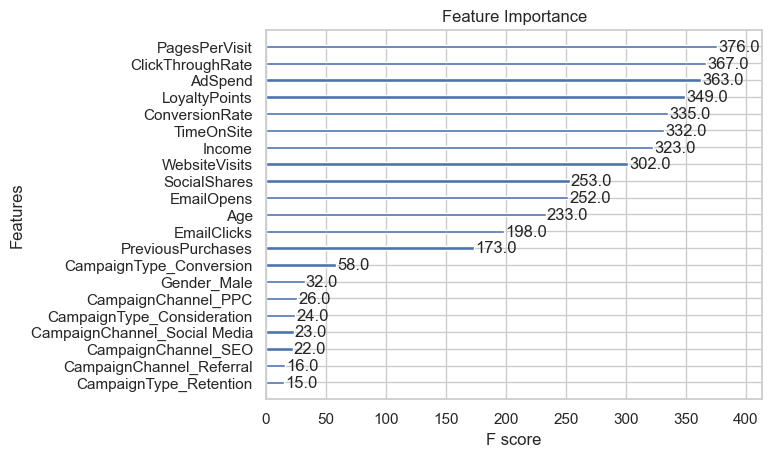

Feature importance values:
Age: 233.0
Income: 323.0
AdSpend: 363.0
ClickThroughRate: 367.0
ConversionRate: 335.0
WebsiteVisits: 302.0
PagesPerVisit: 376.0
TimeOnSite: 332.0
SocialShares: 253.0
EmailOpens: 252.0
EmailClicks: 198.0
PreviousPurchases: 173.0
LoyaltyPoints: 349.0
Gender_Male: 32.0
CampaignChannel_PPC: 26.0
CampaignChannel_Referral: 16.0
CampaignChannel_SEO: 22.0
CampaignChannel_Social Media: 23.0
CampaignType_Consideration: 24.0
CampaignType_Conversion: 58.0
CampaignType_Retention: 15.0


In [89]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, and y_test are already defined

# Initialize the model
model = xgb.XGBClassifier()

# Fit the model
model.fit(x_train, y_train)

# Make predictions
preds = model.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, preds)
print(accuracy_score(y_test, preds))
# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test,preds))

# Plot feature importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Print feature importance values
feature_importance = model.get_booster().get_score(importance_type='weight')
print("Feature importance values:")
for feature, importance in feature_importance.items():
    print(f'{feature}: {importance}')

Scale Pos Weight: 0.1416339636104174
Accuracy: 0.9025

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.59       194
           1       0.94      0.95      0.94      1406

    accuracy                           0.90      1600
   macro avg       0.77      0.77      0.77      1600
weighted avg       0.90      0.90      0.90      1600



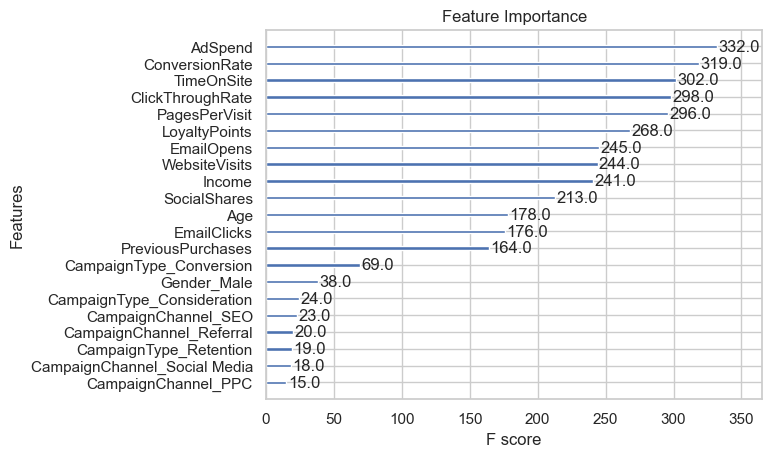

Feature importance values:
Age: 178.0
Income: 241.0
AdSpend: 332.0
ClickThroughRate: 298.0
ConversionRate: 319.0
WebsiteVisits: 244.0
PagesPerVisit: 296.0
TimeOnSite: 302.0
SocialShares: 213.0
EmailOpens: 245.0
EmailClicks: 176.0
PreviousPurchases: 164.0
LoyaltyPoints: 268.0
Gender_Male: 38.0
CampaignChannel_PPC: 15.0
CampaignChannel_Referral: 20.0
CampaignChannel_SEO: 23.0
CampaignChannel_Social Media: 18.0
CampaignType_Consideration: 24.0
CampaignType_Conversion: 69.0
CampaignType_Retention: 19.0


In [90]:
from collections import Counter

# Count the occurrences of each class
class_counts = Counter(y_train)
num_negatives = class_counts[0]  # Assuming 0 is the negative class
num_positives = class_counts[1]  # Assuming 1 is the positive class

# Calculate scale_pos_weight
scale_pos_weight = num_negatives / num_positives
print(f"Scale Pos Weight: {scale_pos_weight}")

# Update the XGBoost model with the parameter
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Evaluate
preds = model.predict(x_test)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, preds))

#Plot feature importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Print feature importance values
feature_importance = model.get_booster().get_score(importance_type='weight')
print("Feature importance values:")
for feature, importance in feature_importance.items():
    print(f'{feature}: {importance}')

GRADIENT BOOSTING

In [91]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gb_model.fit(x_train, y_train)

# Make predictions
y_pred = gb_model.predict(x_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 91.19%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.41      0.53       194
           1       0.92      0.98      0.95      1406

    accuracy                           0.91      1600
   macro avg       0.84      0.70      0.74      1600
weighted avg       0.90      0.91      0.90      1600



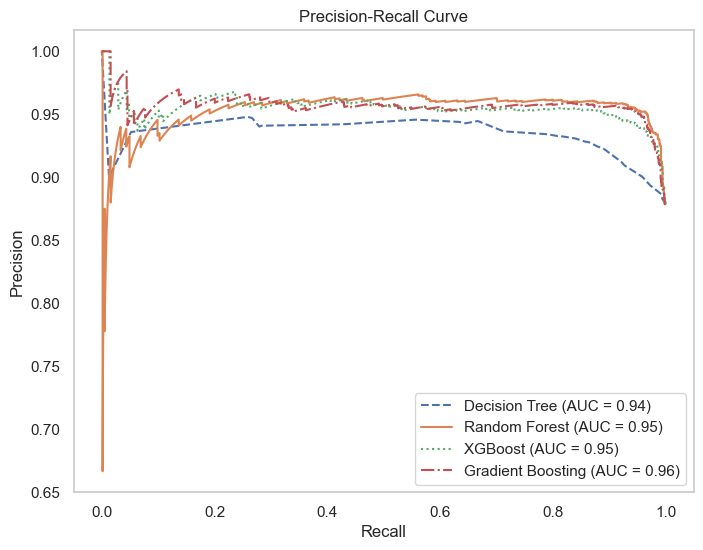

In [92]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for each model
dt_probs = dt_model.predict_proba(x_test)[:, 1]
rf_probs = model_rf.predict_proba(x_test)[:, 1]
xgb_probs = model.predict_proba(x_test)[:, 1]
gb_probs = gb_model.predict_proba(x_test)[:, 1]

# Compute Precision-Recall values
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_probs)

# Compute AUC (Area Under Curve)
dt_auc = auc(dt_recall, dt_precision)
rf_auc = auc(rf_recall, rf_precision)
xgb_auc = auc(xgb_recall, xgb_precision)
gb_auc = auc(gb_recall, gb_precision)

# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(dt_recall, dt_precision, label=f"Decision Tree (AUC = {dt_auc:.2f})", linestyle='dashed')
plt.plot(rf_recall, rf_precision, label=f"Random Forest (AUC = {rf_auc:.2f})", linestyle='solid')
plt.plot(xgb_recall, xgb_precision, label=f"XGBoost (AUC = {xgb_auc:.2f})", linestyle='dotted')
plt.plot(gb_recall, gb_precision, label=f"Gradient Boosting (AUC = {gb_auc:.2f})", linestyle='dashdot')

# Labels and Title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [93]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Assume df2 is your DataFrame and 'target' is the column with imbalanced classes
X = df2.drop('Conversion', axis=1)
y = df2['Conversion']

# Before applying SMOTE
print(f'Original dataset shape: {Counter(y)}')

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# After applying SMOTE
print(f'Resampled dataset shape: {Counter(y_res)}')

# Convert resampled arrays to DataFrame
X_res_df = pd.DataFrame(X_res, columns=X.columns)
y_res_df = pd.DataFrame(y_res, columns=['Conversion'])

# Combine the features and target into a single DataFrame
balanced_df = pd.concat([X_res_df, y_res_df], axis=1)


Original dataset shape: Counter({1: 7012, 0: 988})
Resampled dataset shape: Counter({1: 7012, 0: 7012})


In [98]:
import xgboost as xgb
# Split the data into features and target
X_res = balanced_df.drop('Conversion', axis=1)
y_res = balanced_df['Conversion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Initialize the classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False,scale_pos_weight=scale_pos_weight, eval_metric='logloss')
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifiers
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)

# Evaluate the classifiers
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))

print("\nRandom Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

print("\nXGBoost Classifier:")
print(classification_report(y_test, xgb_predictions))
print("Accuracy:", accuracy_score(y_test, xgb_predictions))

print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gb_predictions))
print("Accuracy:", accuracy_score(y_test, gb_predictions))


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2082
           1       0.85      0.80      0.83      2126

    accuracy                           0.83      4208
   macro avg       0.83      0.83      0.83      4208
weighted avg       0.83      0.83      0.83      4208

Accuracy: 0.8286596958174905

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2082
           1       0.89      0.94      0.92      2126

    accuracy                           0.91      4208
   macro avg       0.91      0.91      0.91      4208
weighted avg       0.91      0.91      0.91      4208

Accuracy: 0.9134980988593155

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2082
           1       0.95      0.83      0.89      2126

    accuracy                           0.89      4

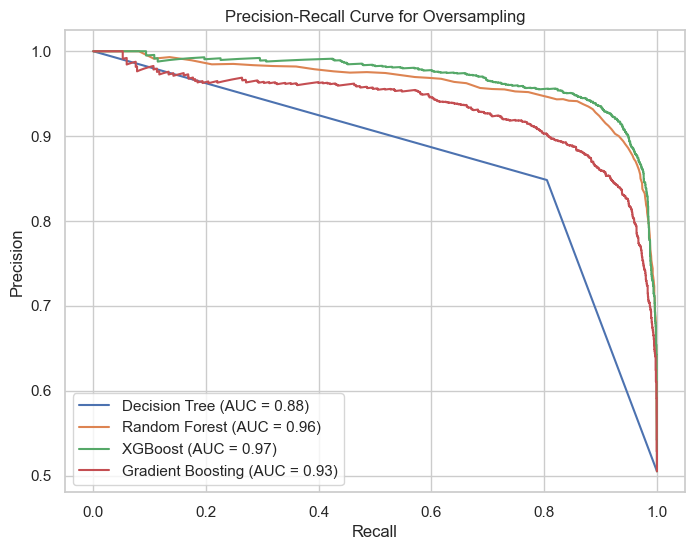

In [99]:
# Import additional necessary libraries
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_test, y_probs, classifier_name):
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'{classifier_name} (AUC = {auc_score:.2f})')

# Get predicted probabilities for the positive class (for precision-recall curve)
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
xgb_probs = xgb_classifier.predict_proba(X_test)[:, 1]
gb_probs = gb_classifier.predict_proba(X_test)[:, 1]

# Create a plot
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for each classifier
plot_precision_recall_curve(y_test, dt_probs, "Decision Tree")
plot_precision_recall_curve(y_test, rf_probs, "Random Forest")
plot_precision_recall_curve(y_test, xgb_probs, "XGBoost")
plot_precision_recall_curve(y_test, gb_probs, "Gradient Boosting")

# Customize the plot
plt.title('Precision-Recall Curve for Oversampling')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
import pickle


# Save the trained XGBoost model using pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)

print("XGBoost model saved successfully.")

# Load the trained XGBoost model from file
with open('xgboost_model.pkl', 'rb') as file:
    loaded_xgb_model = pickle.load(file)

# Make predictions with the loaded model
loaded_predictions = loaded_xgb_model.predict(X_test)
print("Loaded XGBoost Predictions:", loaded_predictions)